<a href="https://colab.research.google.com/github/mgodfrey1294/PyTorch-Tutorial-YouTube/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [3]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [7]:
# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
# Train Test Split! X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [9]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [12]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [13]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # Thru the nextwork to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162348866462708
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003390073776245
Epoch: 50 and loss: 0.2679471969604492
Epoch: 60 and loss: 0.17963500320911407
Epoch: 70 and loss: 0.12165628373622894
Epoch: 80 and loss: 0.08606517314910889
Epoch: 90 and loss: 0.06522617489099503


Text(0.5, 0, 'Epoch')

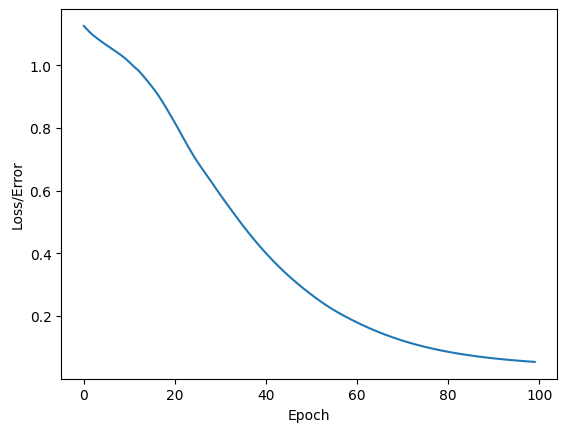

In [16]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')

In [17]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find loss or error

In [18]:
loss

tensor(0.1315)

In [19]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = 'Setossa'
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}. {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1. tensor([-5.8771,  4.4629,  6.5155]) 	 2 	 2
2. tensor([-7.5451,  4.1668,  9.7293]) 	 2 	 2
3. tensor([-8.4517,  5.1275, 10.2015]) 	 2 	 2
4. tensor([-4.3411,  5.6280,  2.5636]) 	 1 	 1
5. tensor([-7.1838,  4.8757,  8.3023]) 	 2 	 2
6. tensor([-3.3940,  5.3421,  1.2802]) 	 1 	 1
7. tensor([-5.9240,  4.9826,  6.0025]) 	 2 	 2
8. tensor([-4.2895,  5.7016,  2.3920]) 	 1 	 1
9. tensor([-6.5369,  4.9261,  7.1291]) 	 2 	 2
10. tensor([-8.0526,  4.4129, 10.3325]) 	 2 	 2
11. tensor([-5.6775,  4.9505,  5.6248]) 	 2 	 2
12. tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	 0
13. tensor([ 4.2646, -2.0055, -2.7342]) 	 0 	 0
14. tensor([-2.1081,  4.0482,  0.5803]) 	 1 	 1
15. tensor([ 3.4608, -1.2147, -2.3488]) 	 0 	 0
16. tensor([-5.4739,  5.1174,  5.0966]) 	 2 	 1
17. tensor([ 4.0637, -1.8045, -2.6504]) 	 0 	 0
18. tensor([-5.8090,  4.6057,  6.2494]) 	 1 	 2
19. tensor([ 4.9250, -2.5763, -3.0545]) 	 0 	 0
20. tensor([ 3.4559, -1.2559, -2.3637]) 	 0 	 0
21. tensor([-2.6161,  4.5584,  0.8575]) 	 1 	 1
2

In [20]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [21]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5445, -2.2478, -2.8698])


In [22]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [23]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-5.9960,  4.5080,  6.6831])


In [24]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [25]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [26]:
# Make sure it loaded correclty
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [27]:
with torch.no_grad():
  print(new_model(new_iris))

tensor([ 4.5445, -2.2478, -2.8698])


In [28]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-5.9960,  4.5080,  6.6831])
